## Import Required Libraries
Import all necessary libraries required for k-means clustering.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
    

## Load the Dataset
Load the Iris dataset from the sklearn library and explore its structure.

In [2]:

# Load Iris data
iris = load_iris()
X = iris.data
y = iris.target
    

## Implement k-Means Clustering
Implement the k-means clustering algorithm manually to understand its workings.

In [3]:

def initialize_centroids(X, k, init='random'):
    if init == 'random':
        indices = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[indices]
    elif init == 'k-means++':
        centroids = [X[np.random.randint(X.shape[0])]]
        for _ in range(1, k):
            dist_sq = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in X])
            probs = dist_sq / dist_sq.sum()
            cumulative_probs = probs.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probs):
                if r < p:
                    centroids.append(X[j])
                    break
        centroids = np.array(centroids)
    return centroids

def k_means(X, k, max_iter=300, init='random'):
    centroids = initialize_centroids(X, k, init)
    for i in range(max_iter):
        # Assign clusters
        cluster_labels = np.argmin(np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2)), axis=0)
        new_centroids = np.array([X[cluster_labels==j].mean(axis=0) for j in range(k)])
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return cluster_labels, centroids
    

## Cluster the Data
Apply k-means clustering to the Iris dataset using different values of k and different initialization methods.

In [4]:

# Set different values of k
k_values = [2, 3, 5]
init_methods = ['random', 'k-means++']

results = {}
for k in k_values:
    for init in init_methods:
        labels, centroids = k_means(X, k, init=init)
        results[(k, init)] = (labels, centroids)
    

## Visualization
Visualize the clustering results for each scenario to assess the effectiveness of different configurations.

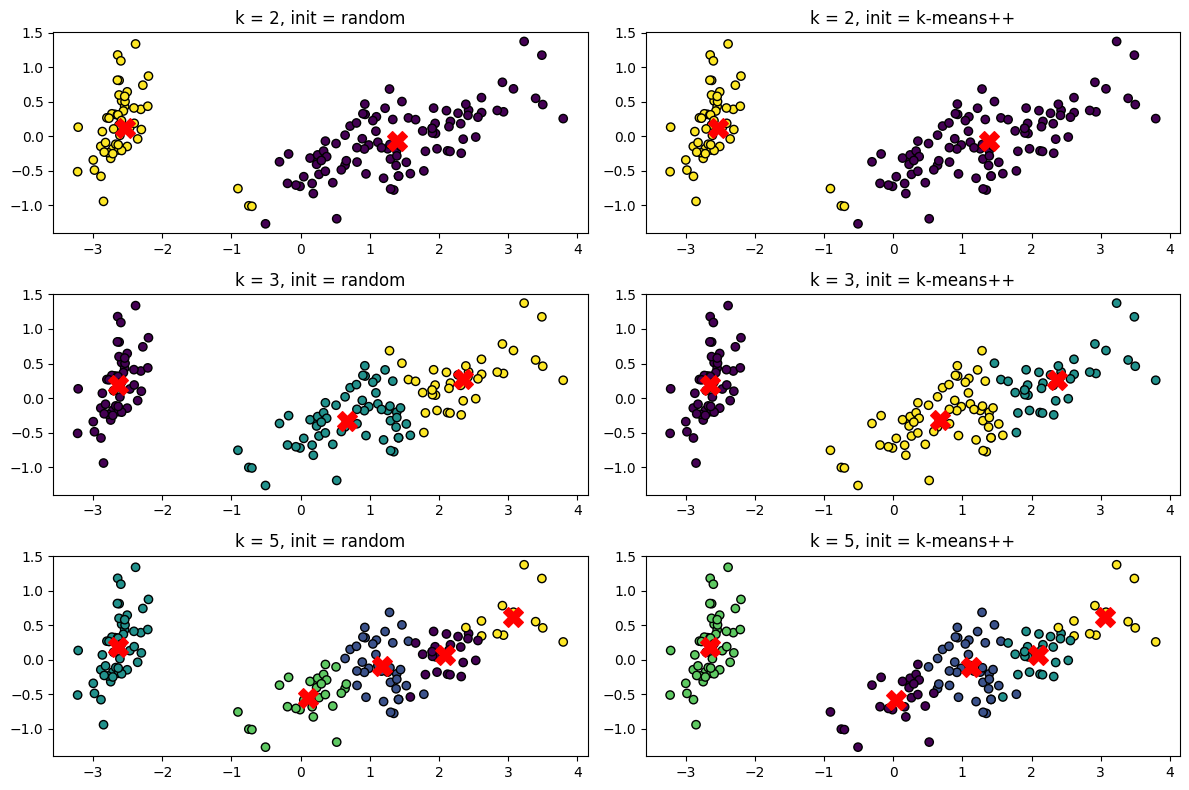

In [5]:

# Visualize the results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, axs = plt.subplots(len(k_values), len(init_methods), figsize=(12, 8))
for i, k in enumerate(k_values):
    for j, init in enumerate(init_methods):
        ax = axs[i, j]
        labels, centroids = results[(k, init)]
        ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
        centroids_pca = pca.transform(centroids)
        ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X')
        ax.set_title(f'k = {k}, init = {init}')
plt.tight_layout()
plt.show()
    

## Analysis
Analyze and compare the results of clustering with different k values and initialization methods.

In [6]:

# Analysis
# Compare the clustering performance using different metrics such as inertia and silhouette score.
from sklearn.metrics import silhouette_score

for k, init in results:
    labels, _ = results[(k, init)]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for k={k}, init='{init}': {score:.2f}")
    

Silhouette Score for k=2, init='random': 0.68
Silhouette Score for k=2, init='k-means++': 0.68
Silhouette Score for k=3, init='random': 0.55
Silhouette Score for k=3, init='k-means++': 0.55
Silhouette Score for k=5, init='random': 0.49
Silhouette Score for k=5, init='k-means++': 0.49
